In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.preprocessing import StandardScaler


In [3]:
df=pd.read_csv("MobilePrice_data.csv")

In [4]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Brand,Name,Colour,Storage,Battery,Camera_Pixel,Selfie_cam_pixel,Display_size,RAM,Star_ratings,Users_rated,Price
0,0,0,Vivo,vivo Y22,Starlit Blue,128.0,5000.0,50,8,16.63,6.0,3.6,28.0,16499.0
1,1,1,Vivo,vivo Y15s,Mystic Blue,32.0,5000.0,13,8,16.55,3.0,4.1,456.0,9499.0
2,2,2,Vivo,Vivo Y21,Midnight Blue,64.0,5000.0,13,8,16.55,4.0,4.1,4282.0,12634.0
3,3,3,Vivo,Vivo Y33T,Mirror Black,128.0,5000.0,50,16,16.71,8.0,4.2,1117.0,17990.0
4,4,4,Vivo,Vivo Y21,Diamond Glow,64.0,5000.0,13,8,16.55,4.0,4.1,4282.0,13218.0


In [5]:
df.drop(columns=["Unnamed: 0.1","Unnamed: 0"],inplace=True)

In [6]:
df.shape

(923, 12)

In [7]:
df.dtypes

Brand                object
Name                 object
Colour               object
Storage             float64
Battery             float64
Camera_Pixel          int64
Selfie_cam_pixel      int64
Display_size        float64
RAM                 float64
Star_ratings        float64
Users_rated         float64
Price               float64
dtype: object

In [8]:
df.duplicated().sum()

36

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df.columns

Index(['Brand', 'Name', 'Colour', 'Storage', 'Battery', 'Camera_Pixel',
       'Selfie_cam_pixel', 'Display_size', 'RAM', 'Star_ratings',
       'Users_rated', 'Price'],
      dtype='object')

In [12]:
df["Price_range"]=np.where((df["Price"]<=15000),"low range",np.where((df["Price"]>15000)&(df["Price"]<=50000),
                                                                    "medium range",np.where((df["Price"]>50000)&(df["Price"]<=90000),
                                                                                           "High range","very high range")))

In [13]:
df.dtypes

Brand                object
Name                 object
Colour               object
Storage             float64
Battery             float64
Camera_Pixel          int64
Selfie_cam_pixel      int64
Display_size        float64
RAM                 float64
Star_ratings        float64
Users_rated         float64
Price               float64
Price_range          object
dtype: object

In [14]:
df.isnull().sum()

Brand               0
Name                0
Colour              0
Storage             0
Battery             0
Camera_Pixel        0
Selfie_cam_pixel    0
Display_size        0
RAM                 0
Star_ratings        0
Users_rated         0
Price               0
Price_range         0
dtype: int64

In [15]:
cat_col=df.dtypes[df.dtypes==object].index
cat_col

Index(['Brand', 'Name', 'Colour', 'Price_range'], dtype='object')

In [16]:
num_col=df.dtypes[df.dtypes!=object].index
num_col

Index(['Storage', 'Battery', 'Camera_Pixel', 'Selfie_cam_pixel',
       'Display_size', 'RAM', 'Star_ratings', 'Users_rated', 'Price'],
      dtype='object')

### Univariate Analysis

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 887 entries, 0 to 922
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             887 non-null    object 
 1   Name              887 non-null    object 
 2   Colour            887 non-null    object 
 3   Storage           887 non-null    float64
 4   Battery           887 non-null    float64
 5   Camera_Pixel      887 non-null    int64  
 6   Selfie_cam_pixel  887 non-null    int64  
 7   Display_size      887 non-null    float64
 8   RAM               887 non-null    float64
 9   Star_ratings      887 non-null    float64
 10  Users_rated       887 non-null    float64
 11  Price             887 non-null    float64
 12  Price_range       887 non-null    object 
dtypes: float64(7), int64(2), object(4)
memory usage: 97.0+ KB


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


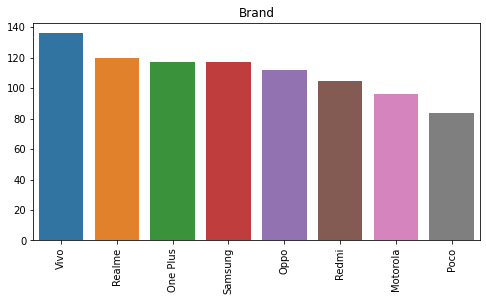

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


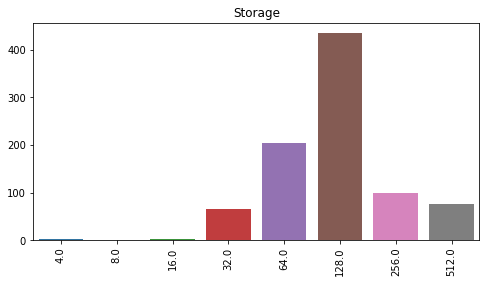

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


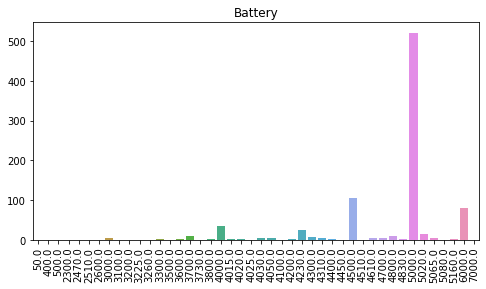

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


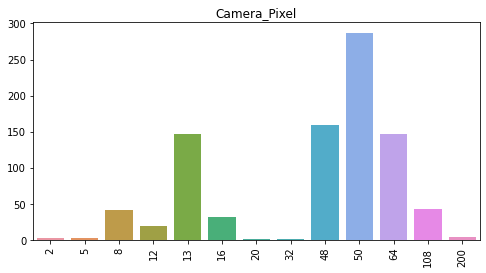

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


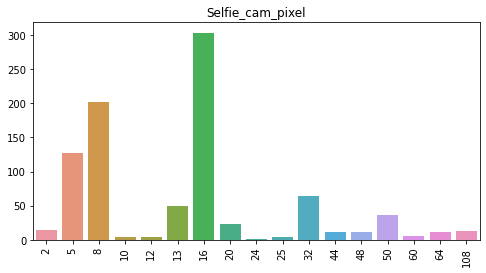

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


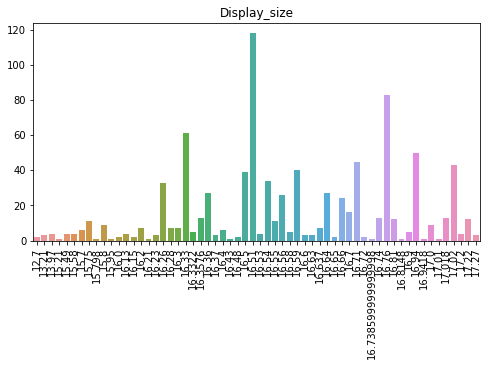

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


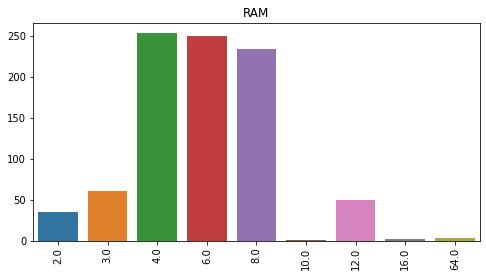

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


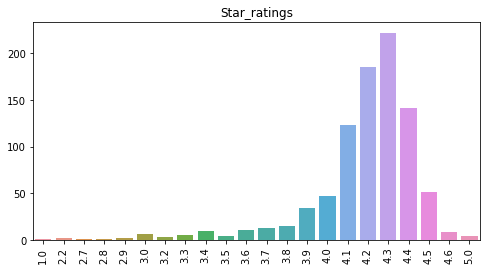

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


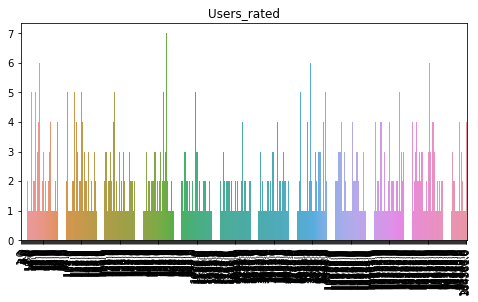

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


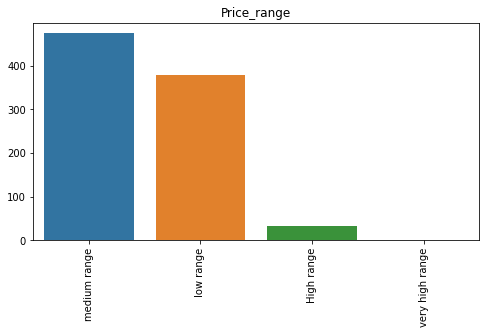

In [18]:
v=["Brand","Storage","Battery","Camera_Pixel","Selfie_cam_pixel","Display_size","RAM","Star_ratings","Users_rated","Price_range"]
for i in v:
    plt.figure(figsize=(8,4))
    sns.barplot(df[i].value_counts().index,df[i].value_counts().values)
    plt.xticks(rotation=90)
    plt.title(i)
    plt.show()

### Inference

**Null values**-

Our dataset doesn't have any null values 

**Duplicate Values**-

There were 36 duplicate values which we dropped

**DTypes**-

There are 4 categorical columns and 9 non categorical columns which we classified saparetely as cat_col and num_col

**Price Bracket**-

On basis of price we created a new columns named as price_range in which we clasified products ranging from "Low" to "Very_High" 

**Count Plot**-

Graphical representation of the value counts of different features 


 

In [19]:
df.describe(percentiles=[0.01,.02,.03,.04,.05,.1,.25,.5,.75,.90,0.91,0.92,0.93,0.94,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,...,91%,92%,93%,94%,95%,96%,97%,98%,99%,max
Storage,887.0,152.951522,125.493864,4.0,32.0000,32.0000,32.00,32.00000,32.000,64.00,...,256.00,512.000,512.000,512.00,512.00,512.00,512.00,512.0,512.00,512.00
Battery,887.0,4856.228861,609.140460,50.0,3000.0000,3444.0000,3700.00,4000.00000,4000.000,4160.00,...,6000.00,6000.000,6000.000,6000.00,6000.00,6000.00,6000.00,6000.0,6000.00,7000.00
Camera_Pixel,887.0,44.970688,25.884124,2.0,8.0000,8.0000,8.00,8.00000,8.000,13.00,...,64.00,64.000,64.000,64.00,108.00,108.00,108.00,108.0,108.00,200.00
Selfie_cam_pixel,887.0,17.904171,16.996244,2.0,2.0000,5.0000,5.00,5.00000,5.000,5.00,...,44.00,48.000,50.000,50.00,50.00,50.00,60.00,64.0,108.00,108.00
Display_size,887.0,16.545452,0.434985,12.7,15.0364,15.6664,15.75,15.79888,15.845,16.26,...,17.00,17.018,17.018,17.02,17.02,17.02,17.02,17.2,17.22,17.27
RAM,887.0,6.151071,4.128270,2.0,2.0000,2.0000,2.00,3.00000,3.000,3.00,...,8.00,8.000,8.000,11.68,12.00,12.00,12.00,12.0,12.00,64.00
Star_ratings,887.0,4.182300,0.301748,1.0,3.0000,3.3000,3.40,3.60000,3.700,3.90,...,4.40,4.400,4.498,4.50,4.50,4.50,4.50,4.5,4.60,5.00
Users_rated,887.0,15087.482525,29892.494881,1.0,4.8600,15.4400,21.00,26.00000,28.000,91.60,...,52113.00,53239.920,54620.560,59699.00,62181.10,71354.08,75615.00,83228.4,95904.86,304361.00
Price,887.0,20451.542277,12977.288535,6399.0,6892.7600,7485.2800,7499.00,7999.00000,8033.500,9499.00,...,36922.66,38999.000,39999.000,42839.00,46874.00,49999.00,54999.00,59999.0,65138.28,149999.00


In [20]:
df["Price_range"].value_counts()

medium range       474
low range          379
High range          33
very high range      1
Name: Price_range, dtype: int64

In [21]:
ij=df["Brand"].value_counts(dropna=False, normalize=True)
ij=pd.DataFrame(ij)
ij.reset_index(inplace=True)

ik=df["Brand"].value_counts(dropna=False)
ik=pd.DataFrame(ik)
ik.reset_index(inplace=True)

my_cnt_per=pd.merge(ik, ij , on='index', how="inner")
my_cnt_per.columns=["Brand", "Cnt", "perc"]
my_cnt_per["perc"]=my_cnt_per["perc"]*100
my_cnt_per

,Brand,Cnt,perc
0,Vivo,136,15.332582
1,Realme,120,13.528749
2,One Plus,117,13.190530
3,Samsung,117,13.190530
4,Oppo,112,12.626832
5,Redmi,105,11.837655
6,Motorola,96,10.822999
7,Poco,84,9.470124


In [22]:
ij=df["RAM"].value_counts(dropna=False, normalize=True)
ij=pd.DataFrame(ij)
ij.reset_index(inplace=True)

ik=df["RAM"].value_counts(dropna=False)
ik=pd.DataFrame(ik)
ik.reset_index(inplace=True)

my_cnt_per=pd.merge(ik, ij , on='index', how="inner")
my_cnt_per.columns=["RAM", "Cnt", "perc"]
my_cnt_per["perc"]=my_cnt_per["perc"]*100
my_cnt_per

,RAM,Cnt,perc
0,4.0,253,28.523112
1,6.0,250,28.184893
2,8.0,234,26.381060
3,3.0,60,6.764374
4,12.0,49,5.524239
5,2.0,35,3.945885
6,64.0,3,0.338219
7,16.0,2,0.225479
8,10.0,1,0.112740


In [23]:
df[df["Storage"]==4]

,Brand,Name,Colour,Storage,Battery,Camera_Pixel,Selfie_cam_pixel,Display_size,RAM,Star_ratings,Users_rated,Price,Price_range
220,Motorola,Moto E40,Carbon Gray,4.0,5000.0,48,8,16.5,64.0,4.0,114.0,10390.0,low range
221,Motorola,Motorola g42,Atlantic Green,4.0,5000.0,50,16,16.4,64.0,1.0,10.0,13999.0,low range
222,Motorola,MOTOROLA Moto g22,Cosmic Black,4.0,5000.0,50,16,16.5,64.0,3.6,84.0,10930.0,low range


In [24]:
df["RAM"].replace(64,4,inplace=True)

In [25]:
df["Storage"].replace(4,64,inplace=True)

In [26]:
ij=df["Storage"].value_counts(dropna=False, normalize=True)
ij=pd.DataFrame(ij)
ij.reset_index(inplace=True)

ik=df["Storage"].value_counts(dropna=False)
ik=pd.DataFrame(ik)
ik.reset_index(inplace=True)

my_cnt_per=pd.merge(ik, ij , on='index', how="inner")
my_cnt_per.columns=["Storage", "Cnt", "perc"]
my_cnt_per["perc"]=my_cnt_per["perc"]*100
my_cnt_per

,Storage,Cnt,perc
0,128.0,435,49.041714
1,64.0,207,23.337091
2,256.0,99,11.161218
3,512.0,77,8.680947
4,32.0,66,7.440812
5,16.0,2,0.225479
6,8.0,1,0.112740


In [27]:
df[df["Storage"]==8]

,Brand,Name,Colour,Storage,Battery,Camera_Pixel,Selfie_cam_pixel,Display_size,RAM,Star_ratings,Users_rated,Price,Price_range
150,Redmi,Redmi 10A Sport,Sea Blue,8.0,5000.0,13,5,15.58,6.0,3.7,481.0,10499.0,low range


In [28]:
df["Storage"].replace(8,128,inplace=True)

In [29]:
df[df["Storage"]==16]

,Brand,Name,Colour,Storage,Battery,Camera_Pixel,Selfie_cam_pixel,Display_size,RAM,Star_ratings,Users_rated,Price,Price_range
731,One Plus,OnePlus One,Silk White,16.0,3100.0,13,5,13.97,3.0,4.4,3662.0,18998.0,medium range
833,Motorola,Moto X,Black Leather,16.0,2300.0,13,2,13.21,2.0,4.2,6219.0,23999.0,medium range


In [30]:
df["Storage"].replace(16,64,inplace=True)

In [31]:

ij=df["Colour"].value_counts(dropna=False, normalize=True)
ij=pd.DataFrame(ij)
ij.reset_index(inplace=True)

ik=df["Colour"].value_counts(dropna=False)
ik=pd.DataFrame(ik)
ik.reset_index(inplace=True)

my_cnt_per=pd.merge(ik, ij , on='index', how="inner")
my_cnt_per.columns=["Colour", "Cnt", "perc"]
my_cnt_per["perc"]=my_cnt_per["perc"]*100
my_cnt_per

,Colour,Cnt,perc
0,Black,27,3.043968
1,Blue,22,2.480271
2,Cool Blue,15,1.691094
3,Yellow,15,1.691094
4,Midnight Black,14,1.578354
...,...,...,...
360,Unicorn White,1,0.112740
361,Sea Green,1,0.112740
362,Matte Aqua,1,0.112740
363,Sunrise Copper,1,0.112740


In [32]:
ij=df["Name"].value_counts(dropna=False, normalize=True)
ij=pd.DataFrame(ij)
ij.reset_index(inplace=True)

ik=df["Name"].value_counts(dropna=False)
ik=pd.DataFrame(ik)
ik.reset_index(inplace=True)

my_cnt_per=pd.merge(ik, ij , on='index', how="inner")
my_cnt_per.columns=["Name", "Cnt", "perc"]
my_cnt_per["perc"]=my_cnt_per["perc"]*100
my_cnt_per

,Name,Cnt,perc
0,SAMSUNG Galaxy,68,7.666291
1,REDMI Note,25,2.818489
2,OnePlus Nord CE,22,2.480271
3,realme 9,21,2.367531
4,vivo T1,17,1.916573
...,...,...,...
264,Redmi 9 Activ,1,0.112740
265,OPPO F21SPRO,1,0.112740
266,POCO M4 Pro,1,0.112740
267,REDMI 11,1,0.112740


In [33]:
ij=df["Camera_Pixel"].value_counts(dropna=False, normalize=True)
ij=pd.DataFrame(ij)
ij.reset_index(inplace=True)

ik=df["Camera_Pixel"].value_counts(dropna=False)
ik=pd.DataFrame(ik)
ik.reset_index(inplace=True)

my_cnt_per=pd.merge(ik, ij , on='index', how="inner")
my_cnt_per.columns=["Camera_Pixel", "Cnt", "perc"]
my_cnt_per["perc"]=my_cnt_per["perc"]*100
my_cnt_per

,Camera_Pixel,Cnt,perc
0,50,287,32.356257
1,48,159,17.925592
2,13,147,16.572717
3,64,147,16.572717
4,108,43,4.847802
5,8,42,4.735062
6,16,32,3.607666
7,12,19,2.142052
8,200,4,0.450958
9,2,3,0.338219


In [34]:
df[df["Camera_Pixel"]==8]

,Brand,Name,Colour,Storage,Battery,Camera_Pixel,Selfie_cam_pixel,Display_size,RAM,Star_ratings,Users_rated,Price,Price_range
12,Vivo,Vivo Y01,Sapphire Blue,32.0,5000.0,8,5,16.53,2.0,3.8,95.0,7999.0,low range
19,Vivo,Vivo Y01,Elegant Black,32.0,5000.0,8,5,16.53,2.0,3.8,95.0,7999.0,low range
86,Realme,realme narzo 50i,Mint Green,32.0,5000.0,8,5,16.51,2.0,4.0,27776.0,7499.0,low range
87,Realme,realme narzo 50i,Mint Green,64.0,5000.0,8,5,16.51,4.0,4.0,27776.0,8999.0,low range
94,Realme,realme narzo 50i,Dark Blue,32.0,5000.0,8,5,16.50,3.0,4.1,1198.0,7999.0,low range
97,Realme,realme narzo 50i,Carbon Black,64.0,5000.0,8,5,16.51,4.0,4.0,27776.0,8999.0,low range
100,Realme,realme narzo 50i,Carbon Black,32.0,5000.0,8,5,16.51,2.0,4.0,27776.0,7499.0,low range
101,Realme,realme C11 2021,Cool Blue,64.0,5000.0,8,5,16.56,4.0,4.1,12095.0,8999.0,low range
112,Realme,realme C11 2021,Cool Grey,64.0,5000.0,8,5,16.56,4.0,4.1,12095.0,8850.0,low range
114,Realme,Realme C30,Denim Black,32.0,5000.0,8,5,16.51,3.0,3.3,2.0,7499.0,low range


In [35]:
df["Camera_Pixel"].replace(2,64,inplace=True)

In [36]:
df["Camera_Pixel"].replace(5,12,inplace=True)

In [37]:
ij=df["Selfie_cam_pixel"].value_counts(dropna=False, normalize=True)
ij=pd.DataFrame(ij)
ij.reset_index(inplace=True)

ik=df["Selfie_cam_pixel"].value_counts(dropna=False)
ik=pd.DataFrame(ik)
ik.reset_index(inplace=True)

my_cnt_per=pd.merge(ik, ij , on='index', how="inner")
my_cnt_per.columns=["Selfie_cam_pixel", "Cnt", "perc"]
my_cnt_per["perc"]=my_cnt_per["perc"]*100
my_cnt_per

,Selfie_cam_pixel,Cnt,perc
0,16,303,34.160090
1,8,202,22.773393
2,5,127,14.317926
3,32,64,7.215333
4,13,50,5.636979
5,50,36,4.058625
6,20,23,2.593010
7,2,14,1.578354
8,108,13,1.465614
9,44,12,1.352875


In [38]:
df[df["Selfie_cam_pixel"]==2]

,Brand,Name,Colour,Storage,Battery,Camera_Pixel,Selfie_cam_pixel,Display_size,RAM,Star_ratings,Users_rated,Price,Price_range
167,Samsung,Samsung Galaxy M32,Blue,128.0,6000.0,64,2,16.20,6.0,4.1,53298.0,15499.0,medium range
168,Samsung,Samsung Galaxy M32,Black,128.0,6000.0,64,2,16.20,6.0,4.1,53298.0,15499.0,medium range
169,Samsung,Samsung Galaxy M32,Blue,64.0,6000.0,64,2,16.20,4.0,4.1,53298.0,13499.0,low range
170,Samsung,Samsung Galaxy M32,Black,64.0,6000.0,64,2,16.20,4.0,4.1,53298.0,13499.0,low range
231,Oppo,OPPO A31,Mystery Black,128.0,4230.0,64,2,16.50,6.0,4.2,57609.0,11990.0,low range
277,Oppo,OPPO F17,Metallic White,128.0,4015.0,48,2,16.33,8.0,4.3,28266.0,17990.0,medium range
280,Oppo,OPPO F21SPRO,Orange,128.0,4500.0,64,2,16.33,8.0,4.3,6.0,21989.0,medium range
283,Oppo,OPPO F17,Magic Blue,128.0,4015.0,48,2,16.33,8.0,4.3,28266.0,17990.0,medium range
311,Oppo,OPPO F21S,Dawnlight Gold,128.0,4500.0,64,2,16.33,8.0,4.1,97.0,21989.0,medium range
318,Oppo,OPPO F21s,Starlight Black,128.0,4500.0,64,2,16.33,8.0,4.1,97.0,21979.0,medium range


In [39]:
df["Selfie_cam_pixel"].replace(108,32,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


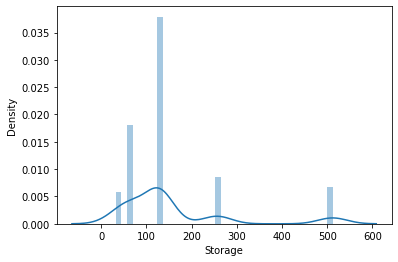

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


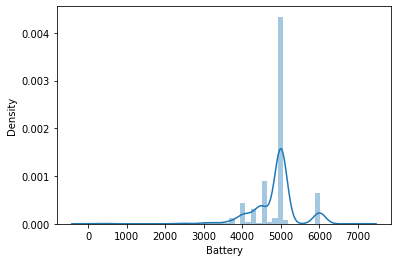

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


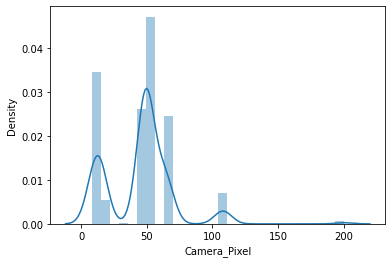

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


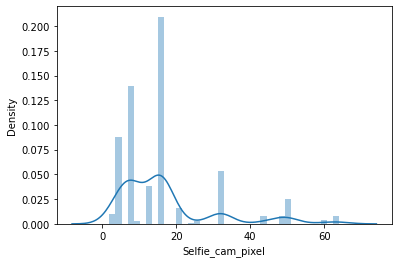

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


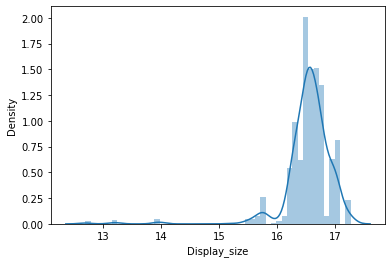

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


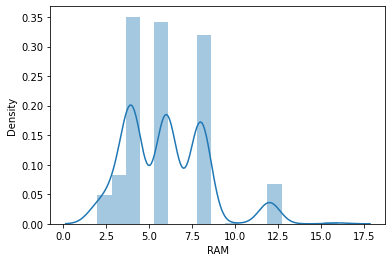

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


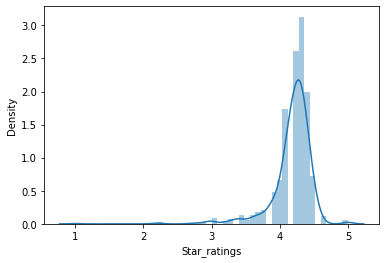

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


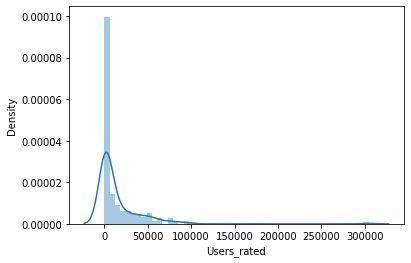

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


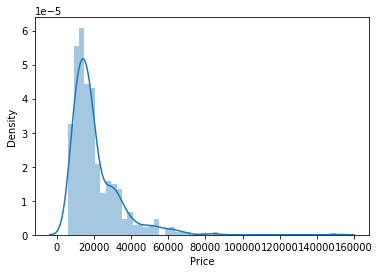

In [40]:



for i in num_col:
    sns.distplot(df[i])
    plt.show()

### Bivariate Analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


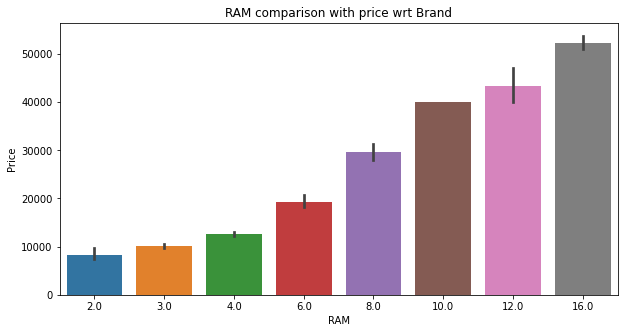

In [41]:
plt.figure(figsize=(10,5))
sns.barplot(df["RAM"],df["Price"])
plt.title("RAM comparison with price wrt Brand")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


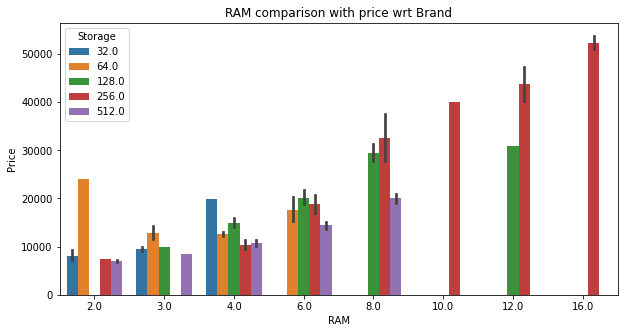

In [42]:
plt.figure(figsize=(10,5))
sns.barplot(df["RAM"],df["Price"],hue=df["Storage"])
plt.title("RAM comparison with price wrt Brand")
plt.show()

**RAM effect on price**-

RAM is an important deciding factor that highly affects the mobile price. Mobile models having high RAM are generally costly
redmi comparatively provides cheaper phones with large RAM

`Possible Reason` Large RAM means large processor which is comparatively costlier than the small processors

**Main Cameras and front camers on price**-

camera pixel is also a deciding factor for price. Mobile price generally increases with increase in camera pixel. Redmi comaparatively provides cheaper mobiles with large pixels

**Storage space with price**-

price generally increases with increases in storage space, Redmi and realme comparatively provides mobile phones at cheaper price followed by vivo at the highest price

In [43]:
df.groupby(["RAM","Brand"]).agg({"Brand":["count"],"Price":["mean"]})

Brand         Price
              count          mean
RAM  Brand                       
2.0  Motorola     4  13999.000000
     Oppo         2  12990.000000
     Realme      13   7131.846154
     Redmi       10   6846.300000
     Samsung      1   7450.000000
     Vivo         5   8319.200000
3.0  Motorola     5   8710.200000
     One Plus     1  18998.000000
     Oppo         9  10380.777778
     Poco         5   8467.200000
     Realme       9   8392.444444
     Redmi        3   8262.333333
     Samsung      4  10624.000000
     Vivo        24  11101.125000
4.0  Motorola    44  11774.090909
     One Plus     1  15345.000000
     Oppo        40  14466.375000
     Poco        17  12177.294118
     Realme      48  11665.000000
     Redmi       46  11213.869565
     Samsung     26  12804.807692
     Vivo        34  14631.294118
6.0  Motorola    23  24148.608696
     One Plus    21  23075.190476
     Oppo        20  18760.850000
     Poco        42  18205.928571
     Realme      34  18240.441176
     Redmi       40  14882.550000
     Samsung     51  19764.784314
     Vivo        19  20890.473684
8.0  Motorola    18  31137.388889
     One Plus    57  36181.684211
     Oppo        37  24092.081081
     Poco        18  23554.555556
     Realme      16  27124.000000
     Redmi        6  16295.166667
     Samsung     35  36343.428571
     Vivo        47  25534.276596
10.0 One Plus     1  39999.000000
12.0 Motorola     2  59999.000000
     One Plus    34  42189.735294
     Oppo         4  37124.500000
     Poco         2  33999.000000
     Vivo         7  51069.285714
16.0 One Plus     2  52374.000000

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


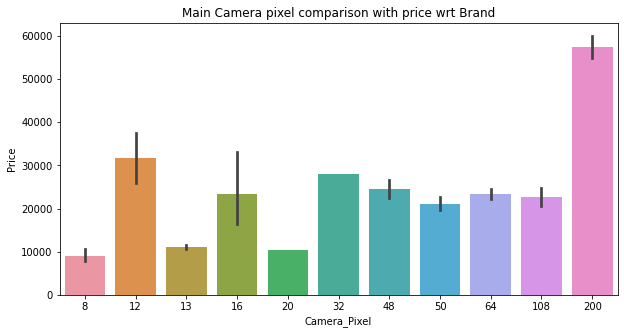

In [44]:
plt.figure(figsize=(10,5))
sns.barplot(df["Camera_Pixel"],df["Price"])
plt.title("Main Camera pixel comparison with price wrt Brand")

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


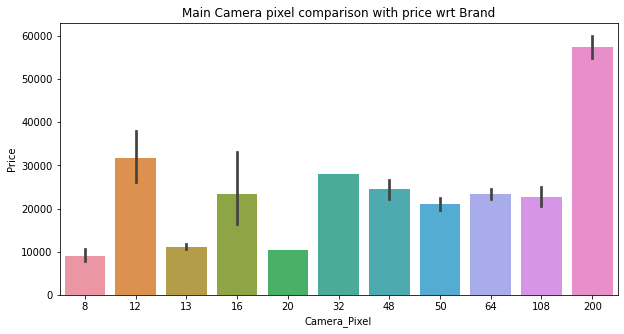

In [45]:
plt.figure(figsize=(10,5))
sns.barplot(df["Camera_Pixel"],df["Price"])
plt.title("Main Camera pixel comparison with price wrt Brand")
plt.show()

In [46]:
df.groupby(["Camera_Pixel","Brand"]).agg({"Brand":["count"],"Price":["mean"]})

Brand         Price
                      count          mean
Camera_Pixel Brand                       
8            Oppo         2  17999.000000
             Realme      29   7915.896552
             Redmi        5   7499.000000
             Samsung      1   7450.000000
             Vivo         5  13397.200000
12           Motorola     2  20499.000000
             Oppo         2  32490.000000
             Poco         6  23999.000000
             Redmi        1   6796.000000
             Samsung      8  43902.875000
             Vivo         2  29440.000000
13           Motorola    12  11149.000000
             One Plus     1  18998.000000
             Oppo        40  12541.125000
             Poco        11   9124.545455
             Realme       7  10027.714286
             Redmi       33   8847.393939
             Samsung      2  11499.000000
             Vivo        41  12325.121951
16           Motorola    11  22090.636364
             One Plus    10  24544.500000
             Oppo         6  27824.666667
             Vivo         5  18838.200000
20           One Plus     1  10499.000000
32           Vivo         1  28000.000000
48           Motorola     9  13598.000000
             One Plus    42  43693.571429
             Oppo        33  20507.909091
             Poco        16  15872.875000
             Realme      22  18148.909091
             Redmi       11  14541.181818
             Samsung     20  14916.550000
             Vivo         6  24979.666667
50           Motorola    35  18539.285714
             One Plus    41  37505.512195
             Oppo        18  21940.555556
             Poco        18  15082.333333
             Realme      40  14105.350000
             Redmi       35  13636.342857
             Samsung     52  21114.634615
             Vivo        48  22051.854167
64           Motorola     9  14382.444444
             One Plus    22  23303.545455
             Oppo        11  24720.181818
             Poco        33  22308.090909
             Realme      17  25409.058824
             Redmi        8  15247.875000
             Samsung     24  24374.791667
             Vivo        26  27753.038462
108          Motorola    14  21787.000000
             Realme       5  17425.200000
             Redmi       12  17224.833333
             Samsung     10  29993.700000
             Vivo         2  38334.500000
200          Motorola     4  57499.000000

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


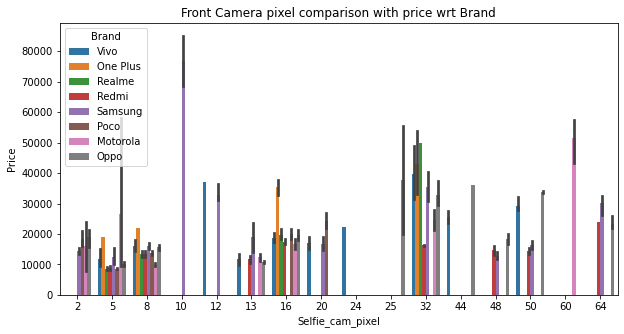

In [47]:
plt.figure(figsize=(10,5))
sns.barplot(df["Selfie_cam_pixel"],df["Price"],hue=df["Brand"])
plt.title("Front Camera pixel comparison with price wrt Brand")
plt.show()

In [48]:
df.groupby(["Selfie_cam_pixel","Brand"]).agg({"Brand":["count"],"Price":["mean"]})

Brand         Price
                          count          mean
Selfie_cam_pixel Brand                       
2                Motorola     2  15974.000000
                 Oppo         6  18987.833333
                 Poco         2  18499.000000
                 Samsung      4  14499.000000
5                Motorola     9  26421.222222
                 One Plus     1  18998.000000
                 Oppo        10  10143.400000
                 Poco         9   8653.555556
                 Realme      43   8630.511628
                 Redmi       35   8905.171429
                 Samsung      8  12379.250000
                 Vivo        12  11682.416667
8                Motorola    22   9837.590909
                 One Plus     2  22099.000000
                 Oppo        25  15570.320000
                 Poco        23  13736.913043
                 Realme      22  13402.136364
                 Redmi       19  13461.052632
                 Samsung     35  16107.600000
                 Vivo        54  16077.796296
10               Samsung      4  76744.500000
12               Samsung      4  32806.750000
                 Vivo         1  36990.000000
13               Motorola     8  12322.375000
                 Oppo        11  10898.454545
                 Redmi       20  11638.500000
                 Samsung      8  18871.500000
                 Vivo         3  11879.666667
16               Motorola    31  16701.387097
                 One Plus   104  35274.903846
                 Oppo        37  19612.324324
                 Poco        33  20005.060606
                 Realme      54  19747.537037
                 Redmi       11  17488.181818
                 Vivo        33  18728.393939
20               Poco        17  24410.764706
                 Samsung      4  16875.250000
                 Vivo         2  16995.000000
24               Vivo         1  22221.000000
25               Oppo         4  37740.000000
32               Motorola    18  24500.777778
                 One Plus    10  42869.000000
                 Oppo         7  32712.000000
                 Realme       1  49999.000000
                 Redmi        5  16241.000000
                 Samsung     20  35370.900000
                 Vivo        16  39777.562500
44               Oppo         1  35990.000000
                 Vivo        11  25481.545455
48               Oppo         6  18265.833333
                 Redmi        3  14696.333333
                 Samsung      3  12855.666667
50               Oppo         2  33750.000000
                 Redmi       11  14572.363636
                 Samsung     20  16400.550000
                 Vivo         3  29332.333333
60               Motorola     6  51665.666667
64               Oppo         3  23332.333333
                 Redmi        1  23990.000000
                 Samsung      7  30203.571429

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


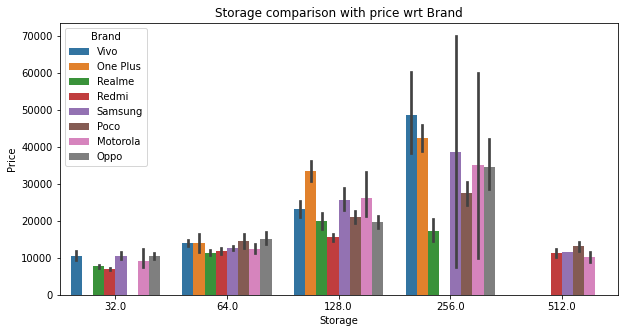

In [49]:
plt.figure(figsize=(10,5))
sns.barplot(df["Storage"],df["Price"],hue=df["Brand"])
plt.title("Storage comparison with price wrt Brand")
plt.show()

In [50]:
df.groupby(["Storage","Brand"]).agg({"Brand":["count"],"Price":["mean"]})

Brand         Price
                 count          mean
Storage Brand                       
32.0    Motorola     6   9258.333333
        Oppo        10  10441.700000
        Realme      20   7662.400000
        Redmi        6   6930.166667
        Samsung      4  10624.000000
        Vivo        20  10414.850000
64.0    Motorola    35  12373.400000
        One Plus     6  13999.000000
        Oppo        32  15204.718750
        Poco        12  14569.833333
        Realme      35  11424.742857
        Redmi       33  11873.606061
        Samsung     20  12521.550000
        Vivo        36  13950.416667
128.0   Motorola    44  26202.000000
        One Plus    70  33404.242857
        Oppo        60  19596.000000
        Poco        31  21011.903226
        Realme      41  19822.804878
        Redmi       30  15552.966667
        Samsung     88  25659.443182
        Vivo        72  23069.652778
256.0   Motorola     4  34999.000000
        One Plus    41  42394.756098
        Oppo        10  34645.600000
        Poco        10  27399.000000
        Realme      24  17353.166667
        Samsung      2  38720.000000
        Vivo         8  48559.375000
512.0   Motorola     7  10284.714286
        Poco        31  13089.741935
        Redmi       36  11171.166667
        Samsung      3  11499.000000

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


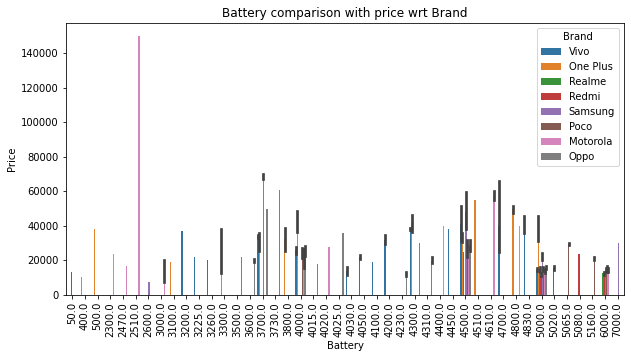

In [51]:
plt.figure(figsize=(10,5))
sns.barplot(df["Battery"],df["Price"],hue=df["Brand"])
plt.title("Battery comparison with price wrt Brand")
plt.xticks(rotation=90)
plt.show()

In [52]:
df.groupby(["Battery","Brand"]).agg({"Brand":["count"],"Price":["mean"]})

Brand         Price
                 count          mean
Battery Brand                       
50.0    Redmi        1  12999.000000
400.0   One Plus     1  10394.000000
500.0   One Plus     1  37999.000000
2300.0  Motorola     1  23999.000000
2470.0  Motorola     1  16999.000000
...                ...           ...
6000.0  Poco         7  14996.428571
        Realme       1  12499.000000
        Redmi       16  12215.750000
        Samsung     43  14534.720930
7000.0  Samsung      1  29999.000000

[71 rows x 2 columns]

Text(0.5, 0, 'MegaPixels')

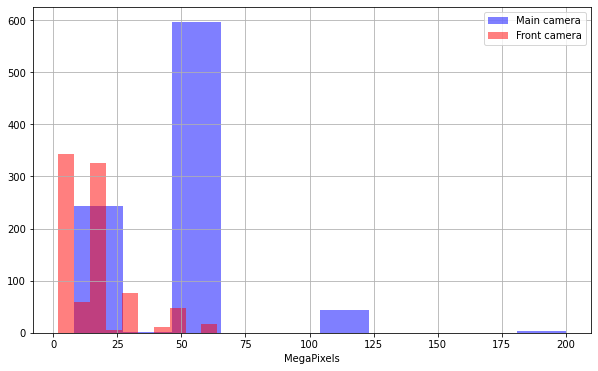

In [53]:
plt.figure(figsize=(10,6))
df["Camera_Pixel"].hist(alpha=0.5,color='blue',label='Main camera')
df["Selfie_cam_pixel"].hist(alpha=0.5,color='red',label='Front camera')
plt.legend()
plt.xlabel('MegaPixels')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


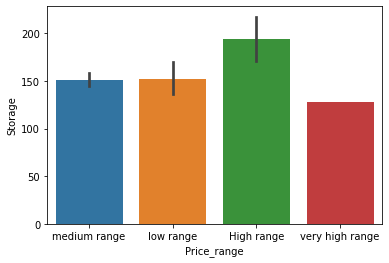

In [54]:
sns.barplot(df["Price_range"],df["Storage"])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


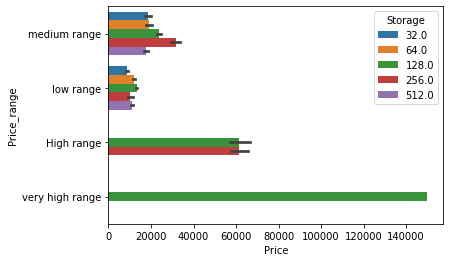

In [55]:
sns.barplot(df["Price"],df["Price_range"],hue=df["Storage"])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


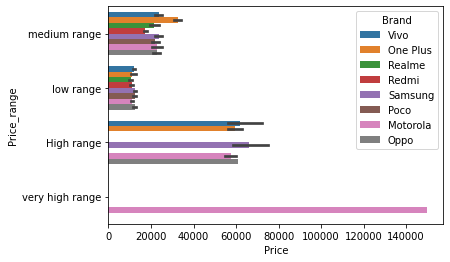

In [56]:
sns.barplot(df["Price"],df["Price_range"],hue=df["Brand"])
plt.show()

<Figure size 720x720 with 0 Axes>

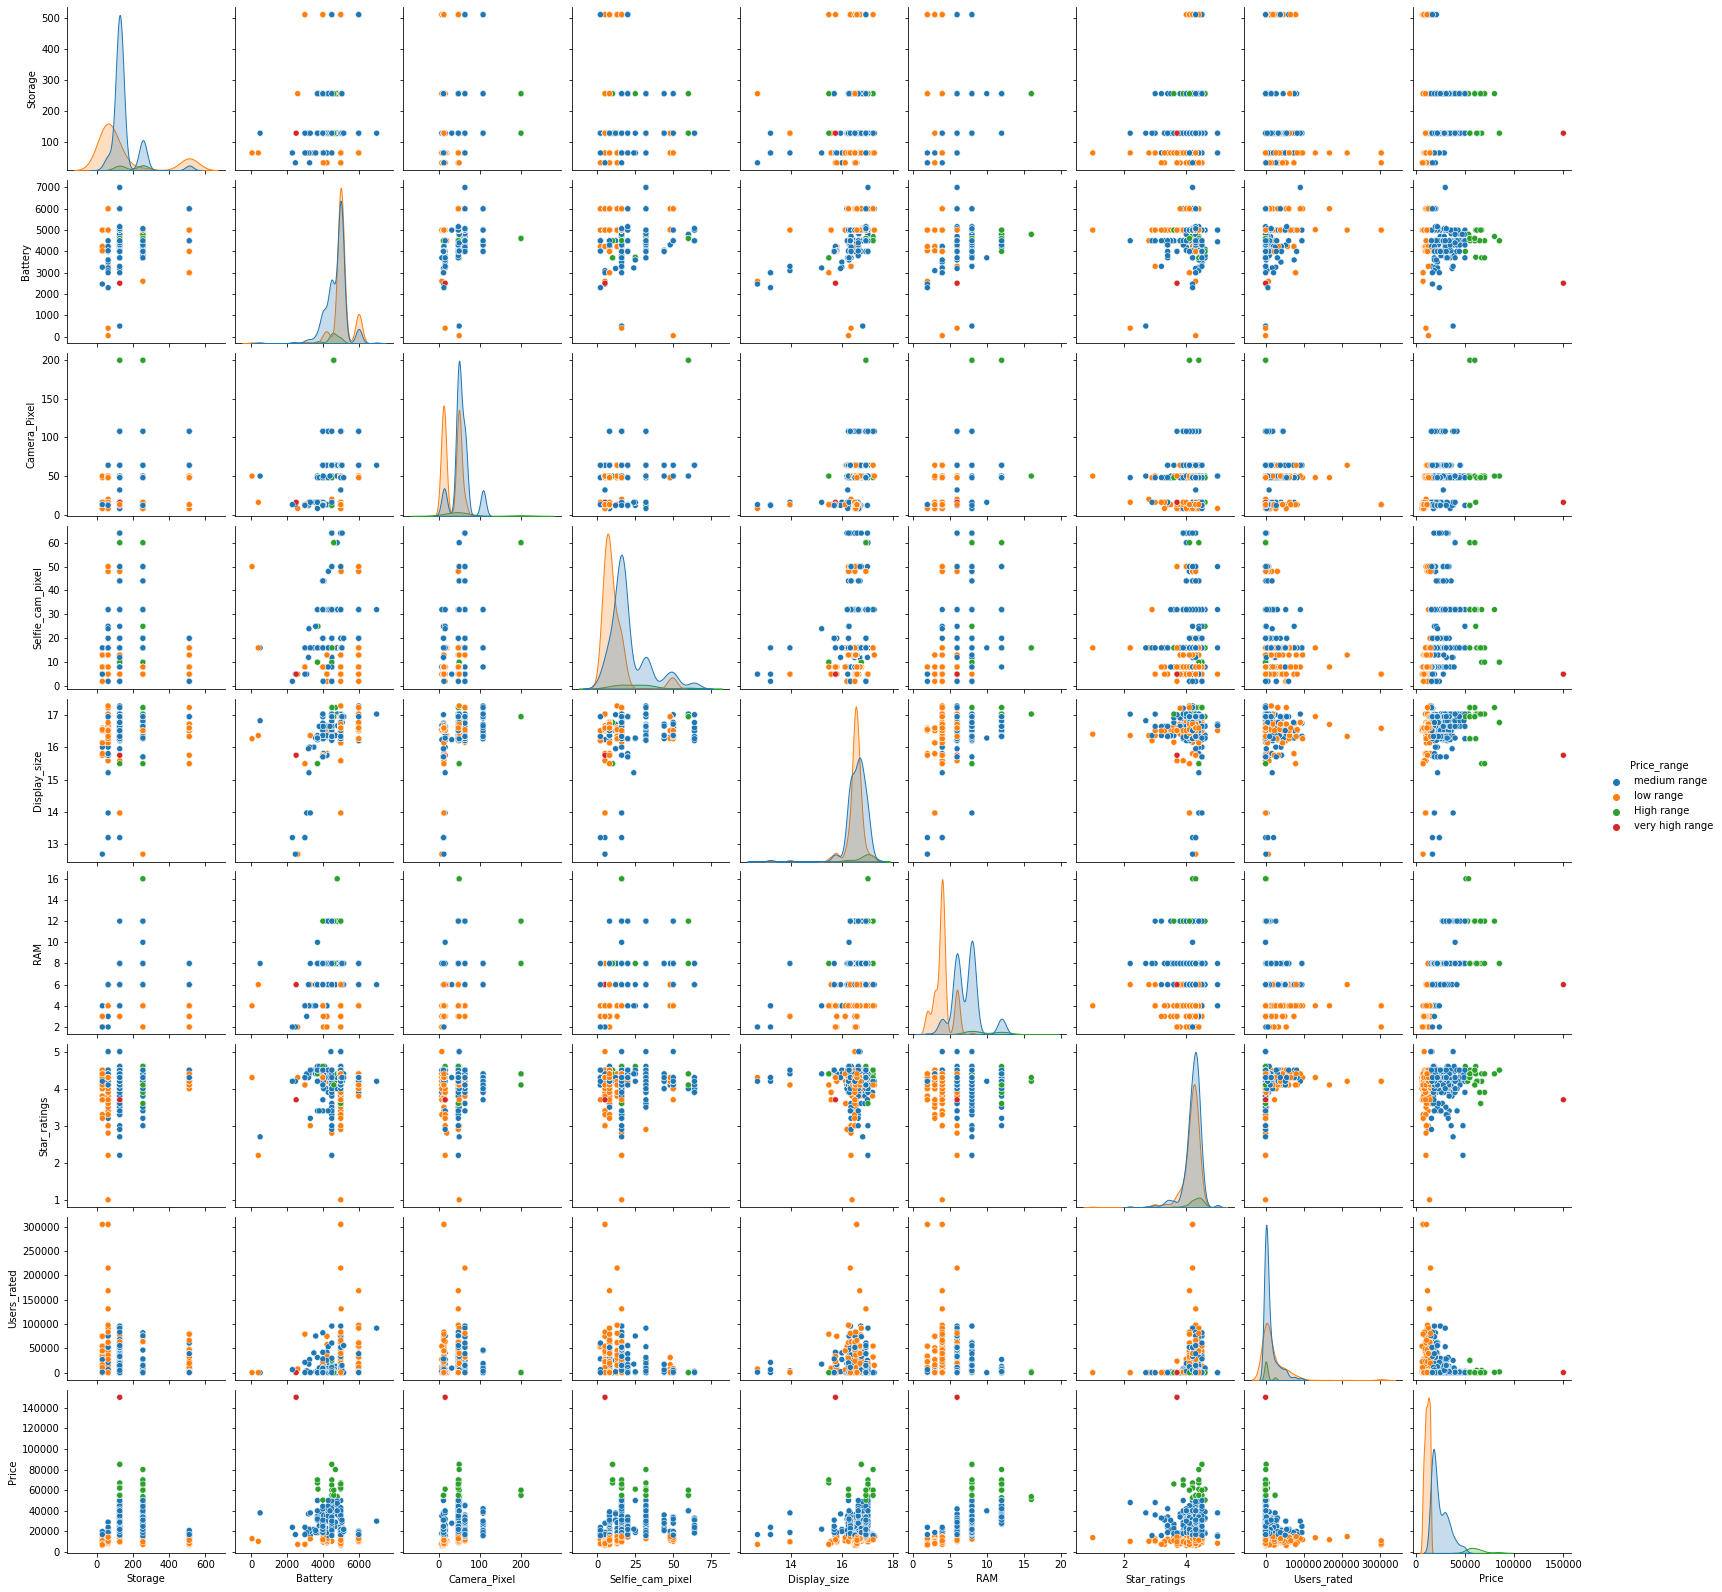

In [57]:
plt.figure(figsize=(10,10))
sns.pairplot(df,hue="Price_range")
plt.show()

In [58]:
from scipy.stats import chi2_contingency

In [59]:
# Chi Square Test
# Brand Vs price_range

# Null Hypo (Ho) : brand and price_range are independent
# Alter Hypo(Ha) : brand and price_range  are associated
# CI - 95% 
#Alpha=.05
# Decision Rule :
#     if p value >= Alpha , Accept Null hypo
#     If p value < Alpha , Reject Null Hyp - Accept alternative Hypothesis

In [60]:
ct=pd.crosstab(df["Brand"],df["Price_range"])
chi2_contingency(ct) # brand and price_range are associated

(182.6118309354071,
 9.201572998060317e-28,
 21,
 array([[ 3.57158963, 41.01916573, 51.30101466,  0.10822999],
        [ 4.35287486, 49.99210823, 62.52311161,  0.1319053 ],
        [ 4.16685457, 47.85569335, 59.85118377,  0.12626832],
        [ 3.12514092, 35.89177001, 44.88838782,  0.09470124],
        [ 4.46448703, 51.27395716, 64.12626832,  0.13528749],
        [ 3.90642616, 44.86471251, 56.11048478,  0.11837655],
        [ 4.35287486, 49.99210823, 62.52311161,  0.1319053 ],
        [ 5.05975197, 58.11048478, 72.67643743,  0.15332582]]))

In [61]:
cat_col=df.dtypes[df.dtypes==object].index
cat_col

Index(['Brand', 'Name', 'Colour', 'Price_range'], dtype='object')

In [62]:
num_col=df.dtypes[df.dtypes!=object].index
num_col

Index(['Storage', 'Battery', 'Camera_Pixel', 'Selfie_cam_pixel',
       'Display_size', 'RAM', 'Star_ratings', 'Users_rated', 'Price'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


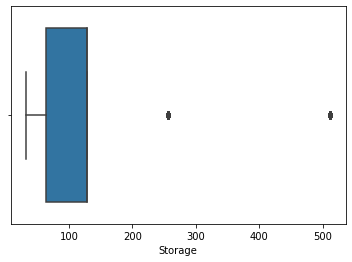

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


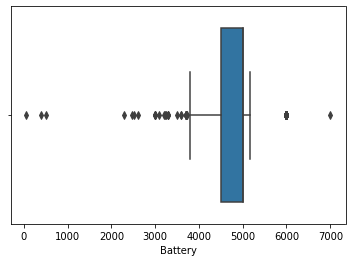

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


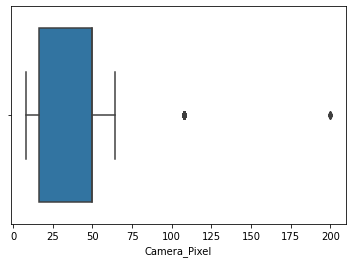

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


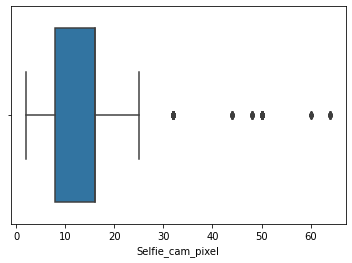

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


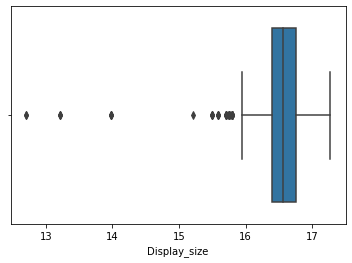

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


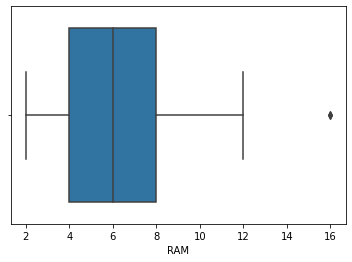

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


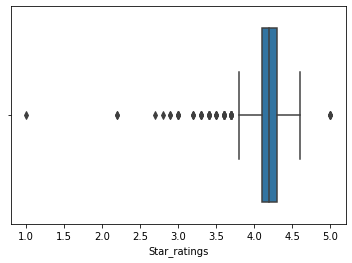

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


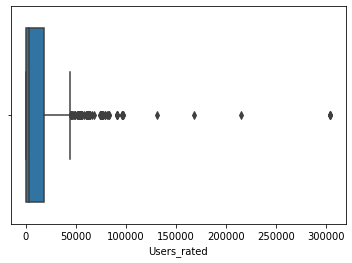

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


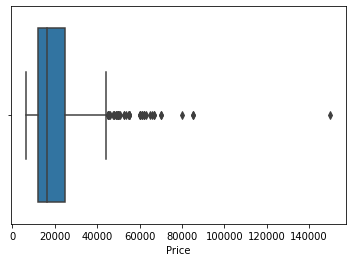

In [63]:
for i in num_col:
    sns.boxplot(df[i])
    plt.show()

In [64]:
df.describe(percentiles=[0.01,.02,.03,.04,.05,.1,.25,.5,.75,.90,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
Storage,887.0,153.397971,125.110707,32.0,32.0000,32.0000,32.00,32.00000,32.000,64.00,64.0,128.00,128.00,256.00,512.00,512.00,512.00,512.0,512.00,512.00
Battery,887.0,4856.228861,609.140460,50.0,3000.0000,3444.0000,3700.00,4000.00000,4000.000,4160.00,4500.0,5000.00,5000.00,5065.00,6000.00,6000.00,6000.00,6000.0,6000.00,7000.00
Camera_Pixel,887.0,45.196167,25.763507,8.0,8.0000,8.0000,8.00,8.00000,12.000,13.00,16.0,50.00,50.00,64.00,108.00,108.00,108.00,108.0,108.00,200.00
Selfie_cam_pixel,887.0,16.790304,13.093646,2.0,2.0000,5.0000,5.00,5.00000,5.000,5.00,8.0,16.00,16.00,32.00,50.00,50.00,50.00,50.0,64.00,64.00
Display_size,887.0,16.545452,0.434985,12.7,15.0364,15.6664,15.75,15.79888,15.845,16.26,16.4,16.56,16.76,16.94,17.02,17.02,17.02,17.2,17.22,17.27
RAM,887.0,5.948140,2.384491,2.0,2.0000,2.0000,2.00,3.00000,3.000,3.00,4.0,6.00,8.00,8.00,12.00,12.00,12.00,12.0,12.00,16.00
Star_ratings,887.0,4.182300,0.301748,1.0,3.0000,3.3000,3.40,3.60000,3.700,3.90,4.1,4.20,4.30,4.40,4.50,4.50,4.50,4.5,4.60,5.00
Users_rated,887.0,15087.482525,29892.494881,1.0,4.8600,15.4400,21.00,26.00000,28.000,91.60,295.0,2678.00,18049.50,46532.00,62181.10,71354.08,75615.00,83228.4,95904.86,304361.00
Price,887.0,20451.542277,12977.288535,6399.0,6892.7600,7485.2800,7499.00,7999.00000,8033.500,9499.00,11999.0,16525.00,24992.50,35199.00,46874.00,49999.00,54999.00,59999.0,65138.28,149999.00


#### outlier treatment

In [65]:
from pyod.models.knn import KNN

In [66]:
# clf = KNN()
# clf.fit()
# outliers = clf.predict(df)

In [67]:
!pip install combo

Defaulting to user installation because normal site-packages is not writeable


In [68]:
from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='RAM', ylabel='Price'>

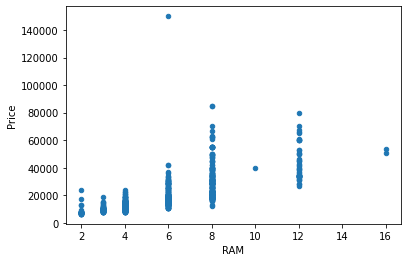

In [69]:
df.plot.scatter('RAM','Price')

In [70]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
df[['Price','RAM']] = scaler.fit_transform(df[["Price","RAM"]])
df[['Price','RAM']].head()

,Price,RAM
0,0.070334,0.285714
1,0.021588,0.071429
2,0.043419,0.142857
3,0.080717,0.428571
4,0.047486,0.142857


In [71]:
X1 = df['Price'].values.reshape(-1,1)
X2 = df['RAM'].values.reshape(-1,1)

X = np.concatenate((X1,X2),axis=1)

In [72]:
X

array([[0.07033426, 0.28571429],
       [0.02158774, 0.07142857],
       [0.04341922, 0.14285714],
       ...,
       [0.1086351 , 0.42857143],
       [0.17130919, 0.42857143],
       [0.17130919, 0.42857143]])

In [73]:
random_state = np.random.RandomState(42)
outliers_fraction = 0.05
# Define seven outlier detection tools to be compared
classifiers = {
        'Angle-based Outlier Detector (ABOD)': ABOD(contamination=outliers_fraction),
        'Cluster-based Local Outlier Factor (CBLOF)':CBLOF(contamination=outliers_fraction,check_estimator=False, random_state=random_state),
        'Feature Bagging':FeatureBagging(LOF(n_neighbors=35),contamination=outliers_fraction,check_estimator=False,random_state=random_state),
        'Histogram-base Outlier Detection (HBOS)': HBOS(contamination=outliers_fraction),
        'Isolation Forest': IForest(contamination=outliers_fraction,random_state=random_state),
        'K Nearest Neighbors (KNN)': KNN(contamination=outliers_fraction),
        'Average KNN': KNN(method='mean',contamination=outliers_fraction)
}

In [74]:
xx , yy = np.meshgrid(np.linspace(0,1 , 10), np.linspace(0, 1, 10))

for i, (clf_name, clf) in enumerate(classifiers.items()):
    clf.fit(X)
    # predict raw anomaly score
    scores_pred = clf.decision_function(X) * -1
        
    # prediction of a datapoint category outlier or inlier
    y_pred = clf.predict(X)
    n_inliers = len(y_pred) - np.count_nonzero(y_pred)
    n_outliers = np.count_nonzero(y_pred == 1)
    plt.figure(figsize=(10, 10))
    dfx = df
    dfx['outlier'] = y_pred.tolist()
    
    # IX1 - inlier feature 1,  IX2 - inlier feature 2
  
    IX1 =  np.array(dfx['RAM'][dfx['outlier'] == 0]).reshape(-1,1)
    IX2 =  np.array(dfx['Price'][dfx['outlier'] == 0]).reshape(-1,1)
    
    # OX1 - outlier feature 1, OX2 - outlier feature 2
    OX1 =  dfx['RAM'][dfx['outlier'] == 1].values.reshape(-1,1)
    OX2 =  dfx['Price'][dfx['outlier'] == 1].values.reshape(-1,1)
         
    print('OUTLIERS : ',n_outliers,'INLIERS : ',n_inliers, clf_name)
        
    # threshold value to consider a datapoint inlier or outlier
    threshold = stats.scoreatpercentile(scores_pred,100 * outliers_fraction)
    
    # decision function calculates the raw anomaly score for every point
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
    Z = Z.reshape(xx.shape)
          
    # fill blue map colormap from minimum anomaly score to threshold value
    plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),cmap=plt.cm.Blues_r)
        
    # draw red contour line where anomaly score is equal to thresold
    a = plt.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')
        
    # fill orange contour lines where range of anomaly score is from threshold to maximum anomaly score
    plt.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')
        
    b = plt.scatter(IX1,IX2, c='white',s=20, edgecolor='k')
    
    c = plt.scatter(OX1,OX2, c='black',s=20, edgecolor='k')
    
    plt.axis('tight')  
    
    # loc=2 is used for the top left corner 
    plt.legend(
        [a.collections[0], b,c],
        ['learned decision function', 'inliers','outliers'],
        prop=matplotlib.font_manager.FontProperties(size=20),
        loc=2)
      
    plt.xlim((0, 1))
    plt.ylim((0, 1))
    plt.title(clf_name)
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\ProgramData\Anaconda3\lib\site-packages

OUTLIERS :  0 INLIERS :  887 Angle-based Outlier Detector (ABOD)


NameError: name 'stats' is not defined

<Figure size 720x720 with 0 Axes>

In [75]:
from scipy import stats

In [76]:
def out_treat(x):
    x=x.clip(upper=x.quantile(0.96))
    x=x.clip(lower=x.quantile(0.05))
    return x
    

In [77]:
df[num_col]=df[num_col].apply(out_treat)

In [78]:
df.describe(percentiles=[0.01,.02,.03,.04,.05,.1,.25,.5,.75,.90,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
Storage,887.0,153.397971,125.110707,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,64.000000,64.000000,128.000000,128.000000,256.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
Battery,887.0,4890.901917,486.864164,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4160.000000,4500.000000,5000.000000,5000.000000,5065.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
Camera_Pixel,887.0,44.970688,23.663824,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,13.000000,16.000000,50.000000,50.000000,64.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
Selfie_cam_pixel,887.0,16.596392,12.287908,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,8.000000,16.000000,16.000000,32.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
Display_size,887.0,16.571728,0.277808,15.845000,15.845000,15.845000,15.845000,15.845000,15.876500,16.260000,16.400000,16.560000,16.760000,16.940000,17.020000,17.020000,17.020000,17.020000,17.020000,17.020000
RAM,887.0,0.284184,0.163929,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.142857,0.285714,0.428571,0.428571,0.714286,0.714286,0.714286,0.714286,0.714286,0.714286
Star_ratings,887.0,4.203269,0.202525,3.700000,3.700000,3.700000,3.700000,3.700000,3.700000,3.900000,4.100000,4.200000,4.300000,4.400000,4.500000,4.500000,4.500000,4.500000,4.500000,4.500000
Users_rated,887.0,13321.583856,20043.949954,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,91.600000,295.000000,2678.000000,18049.500000,46532.000000,62181.100000,69988.284800,71354.080000,71354.080000,71354.080000,71354.080000
Price,887.0,0.094378,0.075338,0.011382,0.011382,0.011382,0.011382,0.011382,0.011550,0.021588,0.038997,0.070515,0.129481,0.200557,0.281859,0.303621,0.303621,0.303621,0.303621,0.303621
outlier,887.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [79]:
11999-(1.5*(24999-11999)) 

-7501.0

In [80]:
24999+1.5*(24999-11999)

44499.0

In [81]:
df["Storage"].value_counts(normalize=True)

128.0    0.491545
64.0     0.235626
256.0    0.111612
512.0    0.086809
32.0     0.074408
Name: Storage, dtype: float64

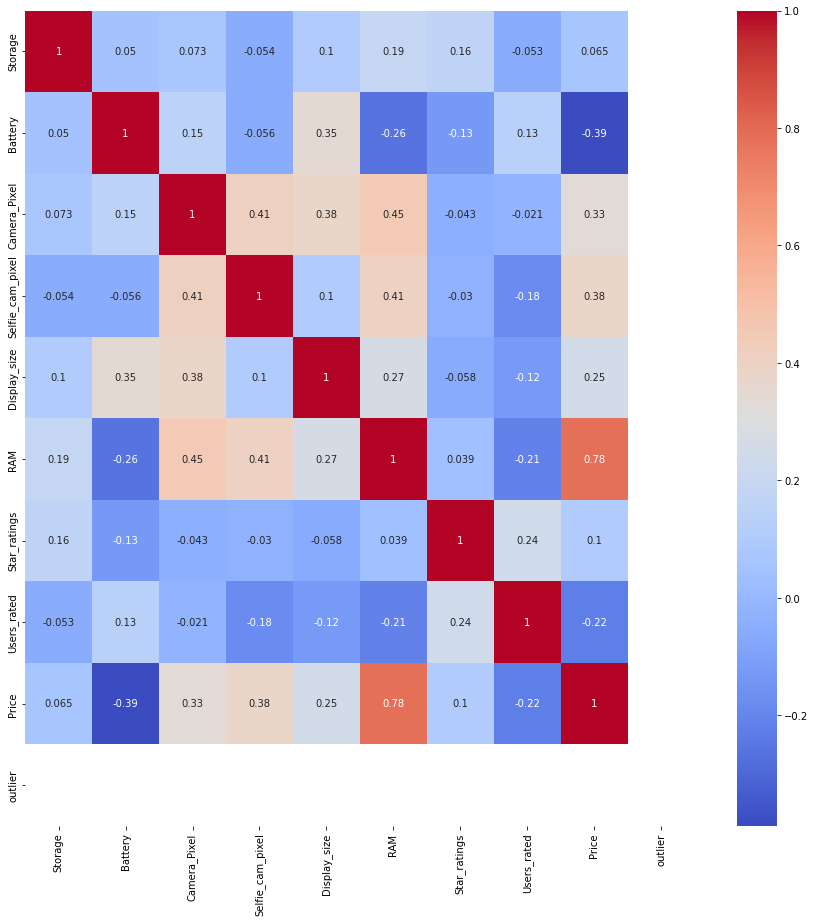

In [82]:
cor=df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(cor,annot=True,cmap="coolwarm")
plt.show()

In [83]:
from scipy import stats

In [84]:
stats.ttest_ind(df["Brand"],df["Price"])

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [85]:
lb=LabelEncoder()
for i in cat_col:
    
    df[i]=lb.fit_transform(df[i])

In [86]:
df.dtypes

Brand                 int32
Name                  int32
Colour                int32
Storage             float64
Battery             float64
Camera_Pixel        float64
Selfie_cam_pixel    float64
Display_size        float64
RAM                 float64
Star_ratings        float64
Users_rated         float64
Price               float64
Price_range           int32
outlier               int64
dtype: object

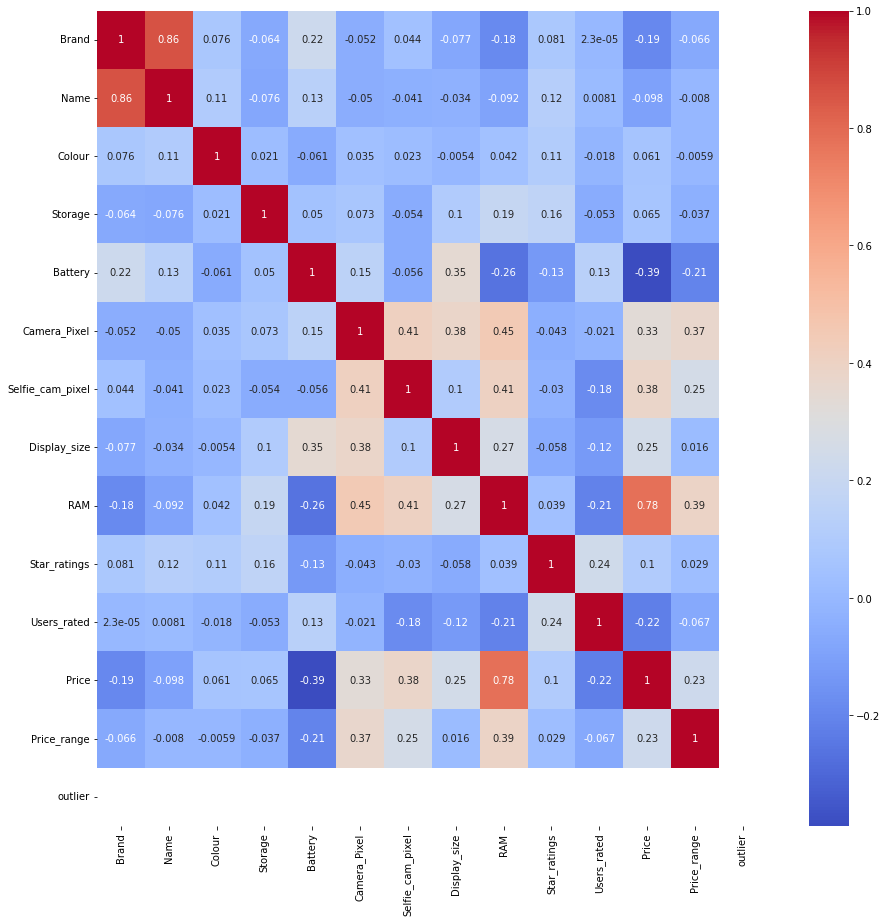

In [87]:
cor=df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(cor,annot=True,cmap="coolwarm")
plt.show()

In [88]:
x=df.drop(columns=["Name","Colour","Price"])
y=df["Price"]

In [89]:
x

,Brand,Storage,Battery,Camera_Pixel,Selfie_cam_pixel,Display_size,RAM,Star_ratings,Users_rated,Price_range,outlier
0,7,128.0,5000.0,50.0,8.0,16.63,0.285714,3.7,28.0,2,0
1,7,32.0,5000.0,13.0,8.0,16.55,0.071429,4.1,456.0,1,0
2,7,64.0,5000.0,13.0,8.0,16.55,0.142857,4.1,4282.0,1,0
3,7,128.0,5000.0,50.0,16.0,16.71,0.428571,4.2,1117.0,2,0
4,7,64.0,5000.0,13.0,8.0,16.55,0.142857,4.1,4282.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
916,3,512.0,5000.0,13.0,8.0,16.59,0.285714,4.4,406.0,1,0
918,3,512.0,6000.0,64.0,20.0,16.94,0.285714,4.3,254.0,2,0
919,3,128.0,5160.0,48.0,20.0,16.94,0.428571,4.3,55611.0,2,0
921,3,256.0,5065.0,64.0,16.0,16.94,0.428571,4.3,14744.0,2,0


In [90]:
y

0      0.070334
1      0.021588
2      0.043419
3      0.080717
4      0.047486
         ...   
916    0.035515
918    0.073816
919    0.108635
921    0.171309
922    0.171309
Name: Price, Length: 887, dtype: float64

In [91]:

lb=LabelEncoder()
for i in cat_col:
    df[i]=lb.fit_transform(df[i])

In [92]:
df.dtypes

Brand                 int64
Name                  int64
Colour                int64
Storage             float64
Battery             float64
Camera_Pixel        float64
Selfie_cam_pixel    float64
Display_size        float64
RAM                 float64
Star_ratings        float64
Users_rated         float64
Price               float64
Price_range           int64
outlier               int64
dtype: object

In [93]:
def model_metric_reg(y_test,y_pred):
    mae=mean_absolute_error(y_test,y_pred)
    mse=mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    # rmse=mean_squared_error(y_test,y_pred,squared=False)
    r2=r2_score(y_test,y_pred)
    print('MAE',mae)
    print('MSE',mse)
    print('RMSE',rmse)
    print('R2 score',r2)

### Linear Regression

In [94]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(665, 11)
(222, 11)
(665,)
(222,)


In [95]:
sc=StandardScaler()
x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.transform(x_test)

In [96]:
m1=LinearRegression()
m1.fit(x_train,y_train)
#m1.fit(x_train_sc,y_train)

LinearRegression()

In [97]:
print(m1.score(x_train,y_train))
print(m1.score(x_test,y_test))

0.7021679808824949
0.6796472226574468


In [98]:
print(m1.score(x_train_sc,y_train))
print(m1.score(x_test_sc,y_test))

-68.88164646949389
-63.8579444471641


C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [99]:
ypred= m1.predict(x_test)

In [100]:
ypred= m1.predict(x_test_sc)

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [101]:
model_metric_reg(y_test,ypred)

MAE 0.5565502448332837
MSE 0.3609458972456022
RMSE 0.6007877306050801
R2 score -63.8579444471641


In [102]:
from sklearn.preprocessing import PolynomialFeatures 

In [103]:
poly_regs= PolynomialFeatures(degree= 2)  
x_poly= poly_regs.fit_transform(x_train)
lin_reg_2 =LinearRegression()  
lin_reg_2.fit(x_poly, y_train) 

LinearRegression()

In [104]:
x_poly1= poly_regs.transform(x_test)


In [105]:
print(lin_reg_2.score(x_poly,y_train))
print(lin_reg_2.score(x_poly1,y_test))

0.8594175096972825
0.8300593356163902


In [106]:
y_pred3=lin_reg_2.predict(x_poly1)
model_metric_reg(y_test,y_pred3)

MAE 0.021784477017963114
MSE 0.0009457497629211071
RMSE 0.03075304477480412
R2 score 0.8300593356163902


In [107]:
import statsmodels.api as sm 

In [108]:
x1=sm.add_constant(x)
reg=sm.OLS(y, x1).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     203.0
Date:                Tue, 29 Nov 2022   Prob (F-statistic):          3.05e-220
Time:                        13:48:35   Log-Likelihood:                 1567.3
No. Observations:                 887   AIC:                            -3113.
Df Residuals:                     876   BIC:                            -3060.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.5680      0.100  

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1918: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [109]:
x_ols=df.drop(columns=["Price","Name","Colour","Camera_Pixel","Brand"])


In [110]:
x1=sm.add_constant(x_ols)
reg=sm.OLS(y, x1).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     252.8
Date:                Tue, 29 Nov 2022   Prob (F-statistic):          7.46e-222
Time:                        13:48:35   Log-Likelihood:                 1565.4
No. Observations:                 887   AIC:                            -3113.
Df Residuals:                     878   BIC:                            -3070.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.6150      0.096  

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1918: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [111]:
from sklearn.linear_model import Ridge,Lasso

In [112]:
l=Lasso(alpha=0.1)
l.fit(x_train,y_train)
y_pred=l.predict(x_test)

In [113]:
print(l.score(x_train,y_train))
print(l.score(x_test,y_test))

0.3612684174428994
0.36189830958248614


In [114]:
r=Ridge(alpha=0.1)
r.fit(x_train,y_train)
y_pred=l.predict(x_test)

In [115]:
print(r.score(x_train,y_train))
print(r.score(x_test,y_test))

0.7021399966066953
0.6801756542170162


### decision tree

In [116]:
m=DecisionTreeRegressor(criterion='squared_error',max_depth=4,min_samples_split=15)
m.fit(x_train,y_train)
y_pred=m.predict(x_test)

In [117]:
m.fit(x_train_sc,y_train)
y_pred=m.predict(x_test_sc)

In [118]:
print(m.score(x_train_sc,y_train))
print(m.score(x_test_sc,y_test))

0.8595126118855378
0.8145444369986475


In [121]:
from sklearn import tree
from sklearn.tree import export_text

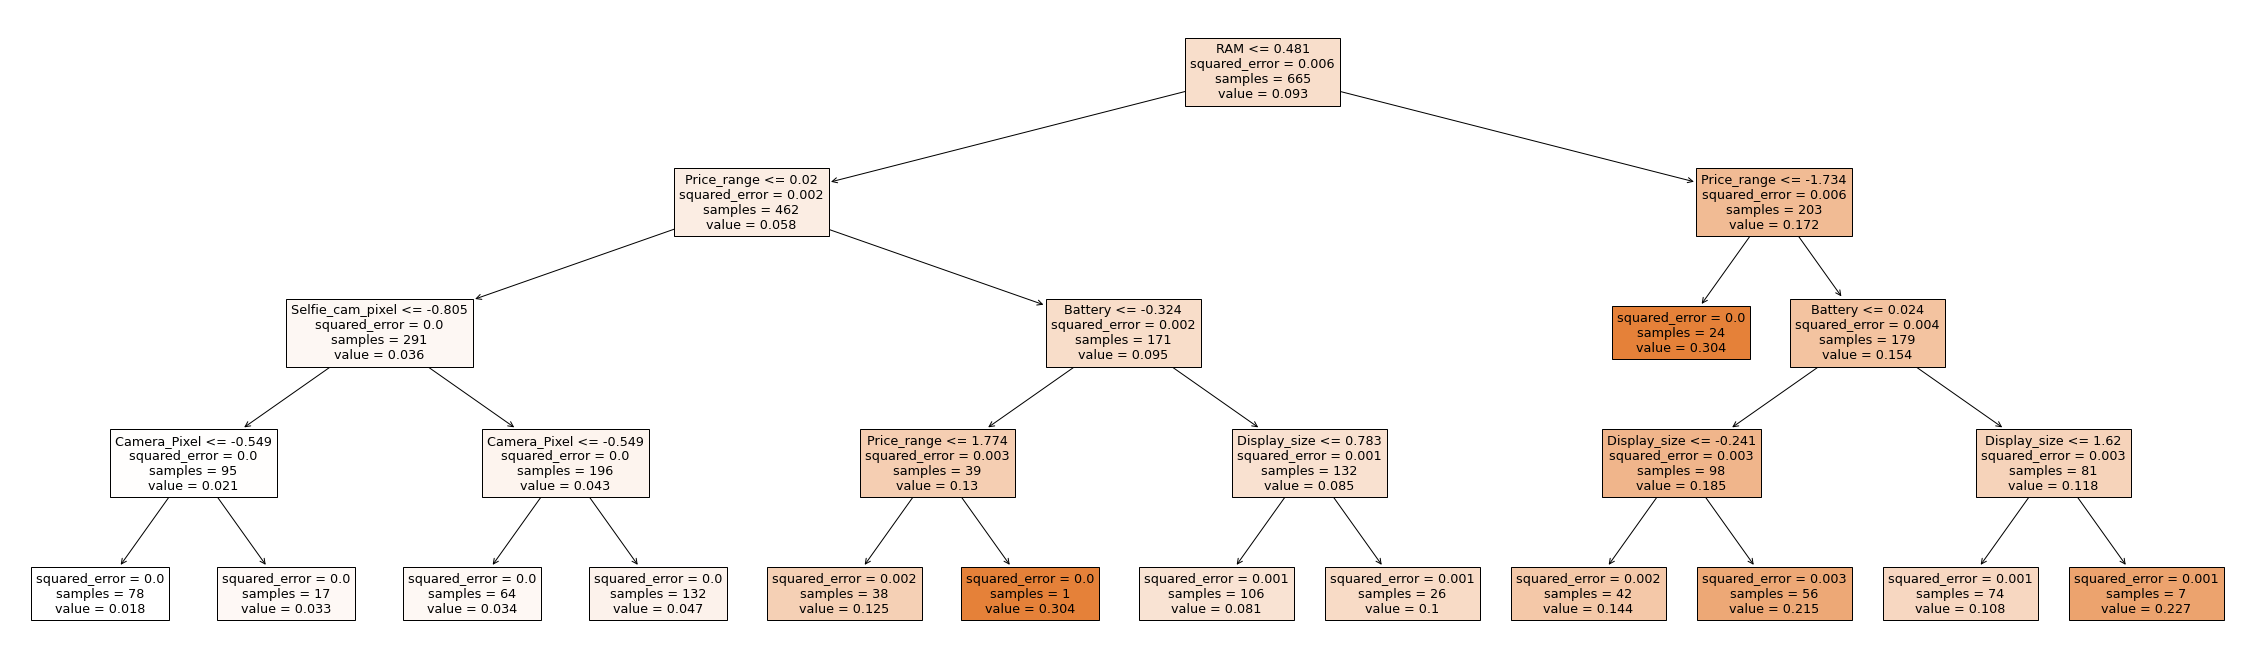

In [126]:
plt.figure(figsize=(40,12))
tree.plot_tree(m,feature_names=x.columns,class_names=df["Price"],filled=True)
plt.show()

In [119]:
print(m.score(x_train,y_train))
print(m.score(x_test,y_test))

0.1047368670977259
0.08773110224920844


C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [120]:
model_metric_reg(y_test,y_pred)

MAE 0.021306472073950374
MSE 0.0010320929094699114
RMSE 0.03212620284860804
R2 score 0.8145444369986475


In [283]:
params={"criterion": ["squared_error", "friedman_mse", "absolute_error", "poisson"],
       "max_depth" :[5, 7,9,11],
       "min_samples_split":[20, 50,100, 200],
       "min_samples_leaf": [5,10,15,30]}

In [199]:
from sklearn.model_selection import GridSearchCV

In [200]:
dtg=DecisionTreeRegressor()

dt_grid=GridSearchCV(estimator=dtg, param_grid=params, cv=10, n_jobs=-1,
                     verbose=2)
dt_grid.fit(x_train,y_train)

Fitting 10 folds for each of 256 candidates, totalling 2560 fits


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [5, 7, 9, 11],
                         'min_samples_leaf': [5, 10, 15, 30],
                         'min_samples_split': [20, 50, 100, 200]},
             verbose=2)

In [201]:
dt_grid.best_params_

{'criterion': 'poisson',
 'max_depth': 7,
 'min_samples_leaf': 5,
 'min_samples_split': 20}

In [93]:
m=DecisionTreeRegressor(criterion='poisson',max_depth=7,min_samples_split=20,min_samples_leaf= 5)
m.fit(x_train_sc,y_train)
print(m.score(x_train_sc,y_train))
print(m.score(x_test_sc,y_test))

0.9164986752864551
0.8667982518802475


In [94]:
model_metric_reg(y_test,y_pred)

MAE 3059.609389819274
MSE 21282746.602462675
RMSE 4613.322729060116
R2 score 0.8145444369986474


### random forest

In [95]:
m2= RandomForestRegressor(criterion='squared_error',n_estimators=70,
                            max_depth=3,min_samples_split=15)
m2.fit(x_train_sc,y_train)
y_pred1=m2.predict(x_test_sc)
print(m2.score(x_train_sc,y_train))
print(m2.score(x_test_sc,y_test))

0.8115824703483152
0.7881839073516755


In [96]:
model_metric_reg(y_test,y_pred1)

MAE 3389.033687589773
MSE 24307861.965430323
RMSE 4930.30039302174
R2 score 0.7881839073516755


In [97]:
Imp=m2.feature_importances_
Imp

array([7.90500176e-03, 0.00000000e+00, 6.86893928e-02, 1.83202782e-03,
       9.32949105e-03, 1.52642580e-02, 6.03525646e-01, 2.50216940e-03,
       2.44381388e-04, 2.90707632e-01])

In [98]:
r=pd.DataFrame({"Var": x_train.columns, "Imp": m2.feature_importances_})

In [99]:
Var=x.columns
feat_mean=Imp.mean()
feat_mean

0.1

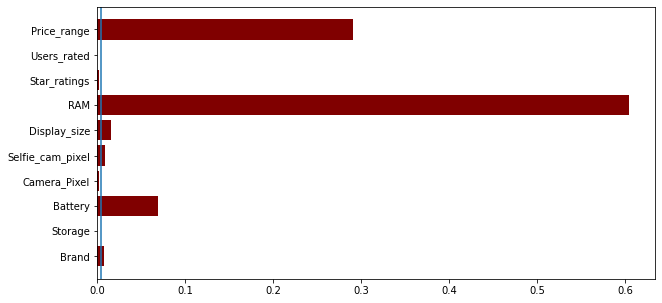

In [100]:
plt.figure(figsize=(10,5))
plt.barh(Var,Imp,color='maroon')
plt.axvline(x=0.005)
plt.show()

In [101]:
params={"criterion": ["squared_error", "absolute_error"],
        "n_estimators":[100,150,200,250],
       "max_depth" :[7,9,11],
       "min_samples_split":[20, 50,100, 200],
        "bootstrap":[True],
        "oob_score":[True],
       "min_samples_leaf": [5,10,15,30]}

In [218]:
rf1=RandomForestRegressor(random_state=0)
Grf=GridSearchCV(estimator=rf1, param_grid=params, cv=5, n_jobs=-1, verbose=1, 
             scoring="neg_mean_squared_error")
Grf.fit(x_train,y_train)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'bootstrap': [True],
                         'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [7, 9, 11],
                         'min_samples_leaf': [5, 10, 15, 30],
                         'min_samples_split': [20, 50, 100, 200],
                         'n_estimators': [100, 150, 200, 250],
                         'oob_score': [True]},
             scoring='neg_mean_squared_error', verbose=1)

In [219]:
Grf.best_params_

{'bootstrap': True,
 'criterion': 'absolute_error',
 'max_depth': 11,
 'min_samples_leaf': 5,
 'min_samples_split': 20,
 'n_estimators': 150,
 'oob_score': True}

In [102]:
m3=RandomForestRegressor(bootstrap=True,criterion="absolute_error",max_depth=11,min_samples_leaf=5,min_samples_split=20,
                        n_estimators=150,oob_score=True)
m3.fit(x_train_sc,y_train)
ypred=m3.predict(x_test_sc)

In [103]:
print(m3.score(x_train_sc,y_train))
print(m3.score(x_test_sc,y_test))

0.9007799104962162
0.8666077778585556


In [104]:
model_metric_reg(ypred,y_test)

MAE 2465.6767942942943
MSE 15307995.169468531
RMSE 3912.5433121524075
R2 score 0.8475862154248177


### xgboost

In [105]:
from xgboost import XGBRegressor

In [106]:
m2=XGBRegressor(n_estimators=100,max_depth=4,reg_lambda=0.2,eta=0.3,eval_metric='rmse',
                gamma=0.5,objective='reg:squarederror', random_state=0,
                reg_alpha=0)
m2.fit(x_train_sc,y_train)
ypred=m2.predict(x_test_sc)

In [107]:
print(m2.score(x_train_sc,y_train))
print(m2.score(x_test_sc,y_test))

0.9953328217189594
0.9056940122834892


In [108]:
model_metric_reg(ypred,y_test)

MAE 1850.3656456749718
MSE 10822487.107872937
RMSE 3289.75487048396
R2 score 0.9034829431131051


In [109]:
params={"gamma":[0.1,0.2,0.3,0.5],
       'eta':[0.1,0.2,0.3,0.5],
       'reg_lambda':[0.1,0.2,0.3],
       'max_depth':[4,5,6]}
print(params)

{'gamma': [0.1, 0.2, 0.3, 0.5], 'eta': [0.1, 0.2, 0.3, 0.5], 'reg_lambda': [0.1, 0.2, 0.3], 'max_depth': [4, 5, 6]}


In [228]:
m2=XGBRegressor(objective="reg:squarederror",eval_metric='rmse')
gs=GridSearchCV(estimator=m2,param_grid=params,scoring='neg_mean_absolute_error',cv=5)
gs.fit(x_train,y_train)

[23:44:38] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:44:38] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:44:39] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:44:39] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:44:39] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:44:39] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[23:44:49] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:44:49] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:44:49] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:44:49] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:44:49] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:44:50] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[23:44:59] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:44:59] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:44:59] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:45:00] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:45:00] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:45:00] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[23:45:10] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:45:10] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:45:10] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:45:10] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:45:10] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:45:11] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[23:45:20] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:45:20] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:45:21] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:45:21] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:45:21] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:45:21] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[23:45:31] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:45:31] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:45:31] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:45:31] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:45:32] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:45:32] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[23:45:41] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:45:41] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:45:41] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:45:41] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:45:42] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:45:42] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[23:45:51] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:45:51] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:45:51] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:45:51] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:45:52] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:45:52] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[23:46:01] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:46:01] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:46:01] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:46:02] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:46:02] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:46:02] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[23:46:11] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:46:11] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:46:11] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:46:12] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:46:12] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:46:12] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[23:46:21] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:46:21] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:46:22] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:46:22] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:46:22] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:46:22] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[23:46:31] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:46:31] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:46:32] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:46:32] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:46:32] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:46:32] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[23:46:41] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:46:41] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:46:42] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:46:42] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:46:42] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:46:42] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[23:46:51] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:46:51] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:46:52] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:46:52] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:46:52] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:46:52] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[23:47:01] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:47:01] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:47:02] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:47:02] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:47:02] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:47:02] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

[23:47:11] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:47:12] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:47:12] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:47:12] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:47:12] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:47:12] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False,
                                    eval_metric='rmse', gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_c...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    objective='reg:linear', predictor=None,
                                    random_state=None, reg_alpha=None, ...),
             param_grid={'eta': [0.1, 0.2, 0.3, 0.5],
                         'gamma': [0.1, 0.2, 0.3, 0.5], 'max_depth': [4, 5, 6],
                         'reg_lambda': [0.1, 0.2, 0.3]},
             scoring='neg_mean_absolute_error')

In [229]:
gs.best_params_

{'eta': 0.3, 'gamma': 0.5, 'max_depth': 6, 'reg_lambda': 0.2}

In [110]:
m2=XGBRegressor(n_estimators=100,max_depth=6,reg_lambda=0.2,eta=0.3,eval_metric='rmse',
                gamma=0.5,objective='reg:squarederror', random_state=0,
                reg_alpha=0)
m2.fit(x_train_sc,y_train)
ypred=m2.predict(x_test_sc)

In [111]:
print(m2.score(x_train_sc,y_train))
print(m2.score(x_test_sc,y_test))

0.9976024668891215
0.902904455029815


In [112]:
model_metric_reg(ypred,y_test)


MAE 1664.5778346706081
MSE 11142614.685618227
RMSE 3338.055524645782
R2 score 0.9016775103874225


In [ ]:
xgboost.plot_importance(m1)
plt.show()

### adaboost

In [113]:
from sklearn.ensemble import AdaBoostRegressor

In [114]:
m3=RandomForestRegressor(bootstrap=True,criterion="poisson",max_depth=11,min_samples_leaf=5,min_samples_split=20,
                        n_estimators=150,oob_score=True)
m1 = AdaBoostRegressor(base_estimator=m3,n_estimators=100)
m1.fit(x_train_sc,y_train)
ypred=m1.predict(x_test_sc)

In [115]:
print(m1.score(x_train_sc,y_train))
print(m1.score(x_test_sc,y_test))

0.9541665414595607
0.8995756926371601


In [116]:
model_metric_reg(ypred,y_test)

MAE 2460.908724335045
MSE 11524621.05607239
RMSE 3394.7932272927005
R2 score 0.8845158785199703


In [117]:
m3=RandomForestRegressor(bootstrap=True,criterion="squared_error",max_depth=11,min_samples_leaf=5,min_samples_split=20,
                        n_estimators=150,oob_score=True)
m1 = AdaBoostRegressor(base_estimator=m3,n_estimators=100)
m1.fit(x_train,y_train)
ypred=m1.predict(x_test)

In [118]:
print(m1.score(x_train,y_train))
print(m1.score(x_test,y_test))

0.948304431857455
0.8971037561821633


In [119]:
model_metric_reg(ypred,y_test)

MAE 2551.7309010583963
MSE 11808298.700127227
RMSE 3436.320517665258
R2 score 0.8792573517449893


In [245]:
params = {'n_estimators':[50,70,80,90,100],
         'base_estimator':[DecisionTreeRegressor(max_depth=1),
                          RandomForestRegressor(criterion='squared_error',n_estimators=70,
                            max_depth=3,min_samples_split=15),
                          RandomForestRegressor(criterion='squared_error',n_estimators=150,
                            max_depth=5,min_samples_split=20)]}
params

{'n_estimators': [50, 70, 80, 90, 100],
 'base_estimator': [DecisionTreeRegressor(max_depth=1),
  RandomForestRegressor(max_depth=3, min_samples_split=15, n_estimators=70),
  RandomForestRegressor(max_depth=5, min_samples_split=20, n_estimators=150)]}

In [246]:
ada = AdaBoostRegressor()
gs1 = GridSearchCV(estimator=ada, param_grid=params,cv=5)
gs1.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(),
             param_grid={'base_estimator': [DecisionTreeRegressor(max_depth=1),
                                            RandomForestRegressor(max_depth=3,
                                                                  min_samples_split=15,
                                                                  n_estimators=70),
                                            RandomForestRegressor(max_depth=5,
                                                                  min_samples_split=20,
                                                                  n_estimators=150)],
                         'n_estimators': [50, 70, 80, 90, 100]})

In [247]:
gs1.best_params_

{'base_estimator': RandomForestRegressor(max_depth=5, min_samples_split=20, n_estimators=150),
 'n_estimators': 90}

In [120]:
r= RandomForestRegressor(max_depth=5, min_samples_split=20, n_estimators=150)
gs=AdaBoostRegressor(base_estimator=r,n_estimators=90)
gs.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=RandomForestRegressor(max_depth=5,
                                                       min_samples_split=20,
                                                       n_estimators=150),
                  n_estimators=90)

In [121]:
print(gs.score(x_train,y_train))
print(gs.score(x_test,y_test))

0.9129536888881399
0.8778088426096067


In [122]:
dt1 = DecisionTreeRegressor(max_depth=4,min_samples_split=20,criterion='squared_error')  # decision stump
m1 = AdaBoostRegressor(base_estimator=dt1,n_estimators=50)
m1.fit(x_train,y_train)
print(m1.score(x_train,y_train))
print(m1.score(x_test,y_test))

0.8960466684018893
0.852654564178905
